In [46]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.stats import sem
import pandas as pd
import seaborn as sns



## Graph Function Code

In [47]:
# Graphs Code

def plot_complete_vs_non_response(pre_index : int,
                                   post_index : int, 
                                   receptor : str, 
                                   set_y_ticks : bool = False, 
                                   start : int = 0, 
                                   end : int = 1.0, 
                                   step = 0.1):
    file = Path("Data.csv")

    #
    # Complete / Partial Rrsponse labels
    # Seperated by pre and post treatments
    c_pre_labels = []
    c_post_labels = []

    # Non Rrsponse labels
    # Seperated by pre and post treatments
    n_pre_labels = []
    n_post_labels = []

    # response index values representing
    # Where the values are located in the cs
    response_index = 11

    with open(file, "r") as f:
        # Skip the first line
        firstline = f.readline().split(",")
        
        for line in f:
            # Split the line into an array based on commas
            line = line.split(",")
            
            # separating by complete responder or partial responder
            if ("complete responder" in line[response_index]  or "partial responder" in line[response_index]):

                    # checks if the current line contains a pre/post value, then converts 
                    # it to a float and appends it to the appropriate list
                    if (line[post_index].rstrip()):
                            post_val = float(line[post_index].rstrip())
                            c_post_labels.append(post_val)

                    if (line[pre_index].rstrip()):
                            pre_val = float(line[pre_index].rstrip())
                            c_pre_labels.append(pre_val)

            # otherwise separates by non responder
            elif ("non-responder" in line[response_index]):

                    if (line[post_index].rstrip()):
                            post_val = float(line[post_index].rstrip())
                            n_post_labels.append(post_val)

                    if (line[pre_index].rstrip()):
                            pre_val = float(line[pre_index].rstrip())
                            n_pre_labels.append(pre_val)

    # Print the n value of each list
    print(f"Results for {receptor}")
    print("Non Pre Response ", len(n_pre_labels))
    print("None Post Response ", len(n_post_labels))
    print("Complete Pre Response ", len(c_pre_labels))
    print("Complete Post Response ", len(c_post_labels))

    # Calculate means and SEMS
    groups = [ "Complete/Partial Response","Non Response"]
    conditions = ["Pre Treatment", "Post Treatment"]

    values = [c_pre_labels, c_post_labels, n_pre_labels, n_post_labels ]

    means = [np.mean(group) for group in values]
    sems = [sem(group) for group in values]

    # Create the bar plot with error bars

    # Create format for data frame
    data = {
        f"{receptor} Expression": means,
        "Clinical Response": np.repeat(groups, 2),
        "Condition": conditions * 2,
        "SEM": sems
    }

    # sets the figure size, style, and bar width

    df = pd.DataFrame(data)
    sns.set(style="whitegrid")
    plt.figure(figsize=(6,6))
    bar_width = 0.45

    # Create Bar Plot
    ax = sns.barplot(x="Clinical Response", y=f"{receptor} Expression", hue="Condition", data=df, capsize=0.1, palette=["#4472C4","#ED7D31"], width=bar_width)

    # added error bars manually

    for index, row in df.iterrows():
        if (index < 2):
            plt.errorbar(index*0.225 + -0.11, row[f"{receptor} Expression"], yerr=row["SEM"], fmt="none", c="black", capsize=5)
        else:
            plt.errorbar(index*0.225 + 0.44, row[f"{receptor} Expression"], yerr=row["SEM"], fmt="none", c="black", capsize=5)

    # setting the title, labels, and the legend

    ax.set_title(f"{receptor} Results")
    ax.set_xlabel("Clinical Response")
    ax.set_ylabel(f"{receptor} Expression")
    if set_y_ticks:
        ax.set_yticks(np.arange(start, end, step))

    plt.legend(title="Legend", loc="best")
    plt.tight_layout()

    plt.show()

# Complete vs Non Response Graphs

## ERBB2 Graph

Results for ERBB2
Non Pre Response  113
None Post Response  92
Complete Pre Response  93
Complete Post Response  5


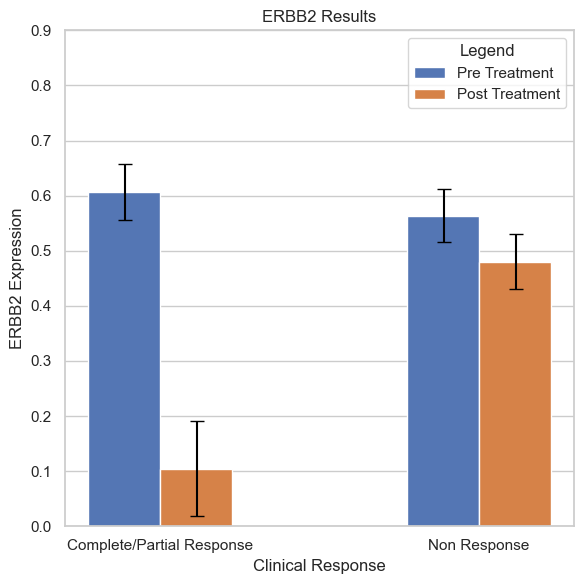

In [48]:
plot_complete_vs_non_response(pre_index=-9, post_index=-4, receptor="ERBB2", set_y_ticks=True)

## ERBB3 Graph

Results for ERBB3
Non Pre Response  113
None Post Response  92
Complete Pre Response  93
Complete Post Response  5


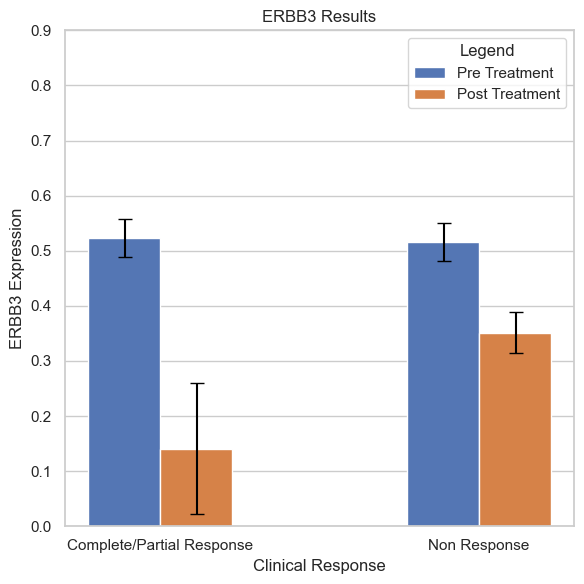

In [49]:
plot_complete_vs_non_response(pre_index=-8, post_index=-3, receptor="ERBB3", set_y_ticks=True)

## ERBB4 Graph

Results for ERBB4
Non Pre Response  113
None Post Response  92
Complete Pre Response  93
Complete Post Response  5


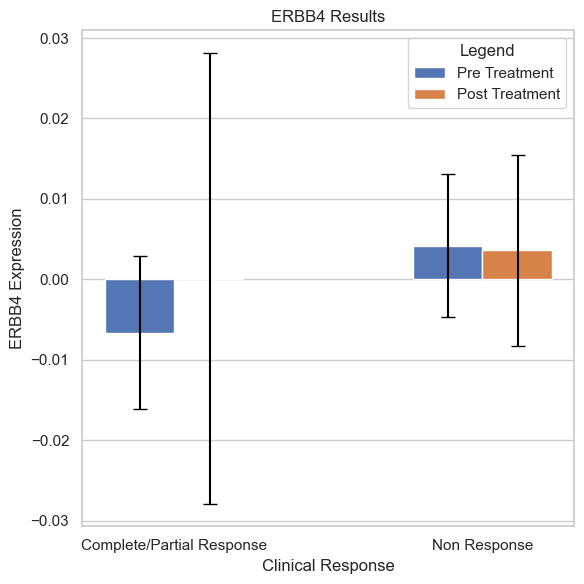

In [50]:
plot_complete_vs_non_response(pre_index=-7, post_index=-2, receptor="ERBB4")

## EGFR Graph

Results for EGFR
Non Pre Response  113
None Post Response  92
Complete Pre Response  93
Complete Post Response  5


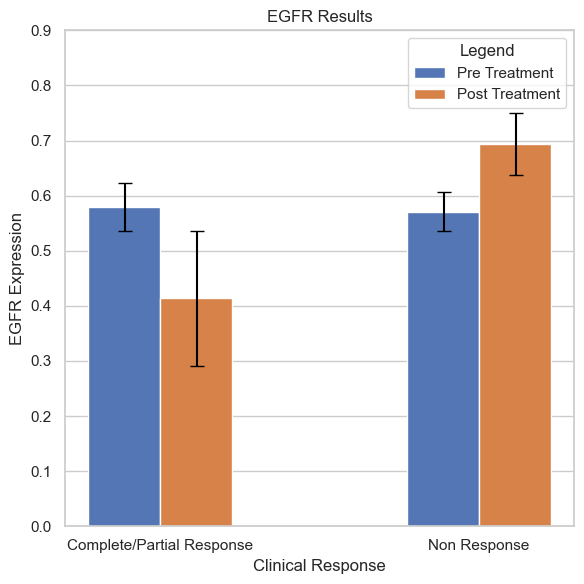

In [51]:
plot_complete_vs_non_response(pre_index=-6, post_index=-1, receptor="EGFR", set_y_ticks=True)

# Cancer Stage Plots

## Cancer Stage Plots Code

In [52]:
def create_cancer_stage_plots(pre_index, post_index, receptor, set_y_ticks=False, start=0, end=1, step=0.1):
    file = Path("Data.csv")
    labels = []
    c_pre_labels = []
    c_post_labels = []
    n_pre_labels = []
    n_post_labels = []
    stage_index = 8

    group1 = ["pt1", "pt0", "ptis", "pta"]
    group2 = ["pt4", "pt3", "pt2"]

    with open(file, "r") as f:
        f.readline().split(",")
        labels.append(["Pre", "Post"])
        
        for line in f:
            line = line.split(",")
            stage = line[stage_index][:3].lower()
            temp = []
            if (stage in group1):
                if (line[post_index].rstrip()):
                    post_val = float(line[post_index].rstrip())
                    c_post_labels.append(post_val)
                if (line[pre_index].rstrip()):
                    pre_val = float(line[pre_index].rstrip())
                    c_pre_labels.append(pre_val)
            elif (stage in group2):
                if (line[post_index].rstrip()):
                    post_val = float(line[post_index].rstrip())
                    n_post_labels.append(post_val)
                if (line[pre_index].rstrip()):
                    pre_val = float(line[pre_index].rstrip())
                    n_pre_labels.append(pre_val)
    print(f"Results for {receptor}")
    print("T0-T1 Pre Response ", len(c_pre_labels))
    print("T0-T1 Post Response ", len(c_post_labels))
    print("T2-T4 Pre Response ", len(n_pre_labels))
    print("T2-T4 Post Response ", len(n_post_labels))


    # Calculate means and SEMs
    groups = [ "T0-T1","T2-T4"]
    conditions = ["Pre Treatment", "Post Treatment"]

    values = [c_pre_labels, c_post_labels, n_pre_labels, n_post_labels ]

    means = [np.mean(group) for group in values]
    sems = [sem(group) for group in values]

    # Create the bar plot with error bars
    data = {
        f"{receptor} Expression": means,
        "Clinical Response": np.repeat(groups, 2),
        "Group": conditions * 2,
        "SEM": sems
    }

    df = pd.DataFrame(data)
    sns.set(style="whitegrid")
    plt.figure(figsize=(6,6))
    bar_width = 0.45

    ax = sns.barplot(x="Clinical Response", y=f"{receptor} Expression", hue="Group", data=df, capsize=0.1, palette=["#4472C4","#ED7D31"], width=bar_width)

    # Add Error bars manually

    for index, row in df.iterrows():
        if (index < 2):
            plt.errorbar(index*0.225 + -0.11, row[f"{receptor} Expression"], yerr=row["SEM"], fmt="none", c="black", capsize=5)
        else:
            plt.errorbar(index*0.225 + 0.44, row[f"{receptor} Expression"], yerr=row["SEM"], fmt="none", c="black", capsize=5)

    ax.set_title(f"{receptor} Results")
    ax.set_xlabel("Pathological T Stage")
    ax.set_ylabel(f"{receptor} Expression")
    if set_y_ticks:
        ax.set_yticks(np.arange(start, end, step))
    # ax.set_xticks([0.175, 1.175])
    # ax.set_xticklabels(groups)

    plt.legend(title="Legend", loc="best")
    plt.tight_layout()

    plt.show()


## ERBB2 Graph

Results for ERRB2
T0-T1 Pre Response  121
T0-T1 Post Response  10
T2-T4 Pre Response  164
T2-T4 Post Response  122


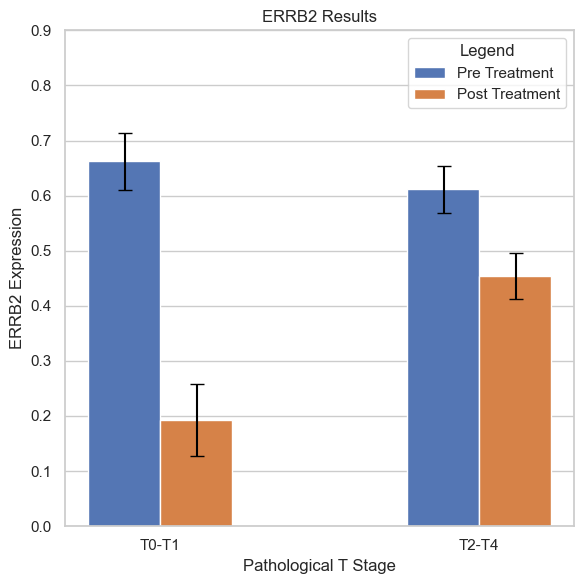

In [53]:
create_cancer_stage_plots(pre_index=-9, post_index=-4, receptor="ERRB2", set_y_ticks=True)

## ERBB3 Graph

Results for ERRB3
T0-T1 Pre Response  121
T0-T1 Post Response  10
T2-T4 Pre Response  164
T2-T4 Post Response  122


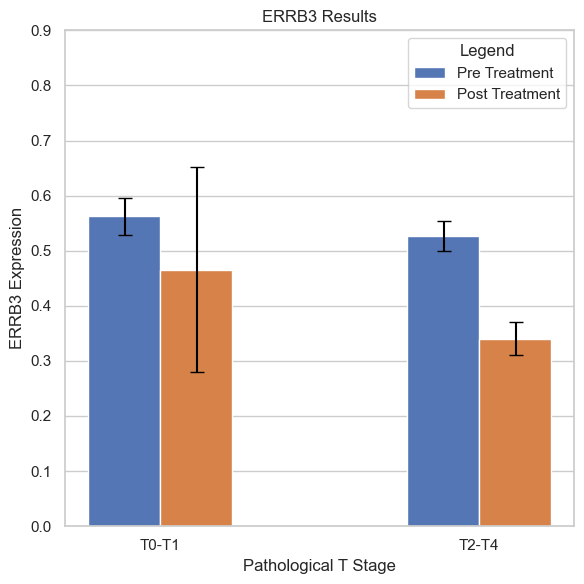

In [54]:
create_cancer_stage_plots(pre_index=-8, post_index=-3, receptor="ERRB3", set_y_ticks=True)

## ERBB4 Graph

Results for ERRB4
T0-T1 Pre Response  121
T0-T1 Post Response  10
T2-T4 Pre Response  164
T2-T4 Post Response  122


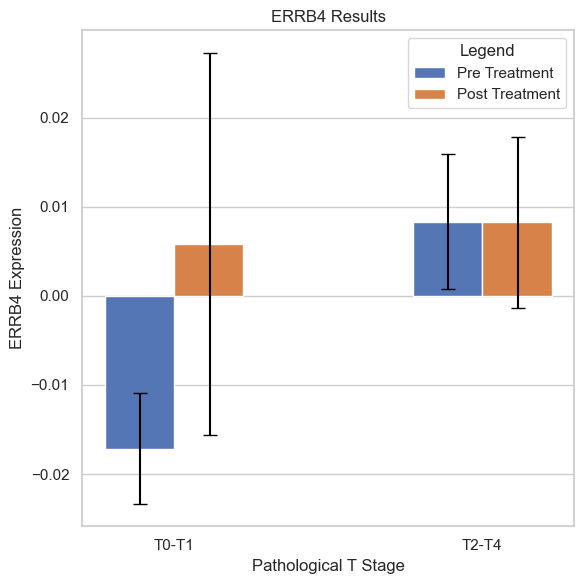

In [55]:
create_cancer_stage_plots(pre_index=-7, post_index=-2, receptor="ERRB4", set_y_ticks=False)

## EGFR Graph

Results for EGFR
T0-T1 Pre Response  121
T0-T1 Post Response  10
T2-T4 Pre Response  164
T2-T4 Post Response  122


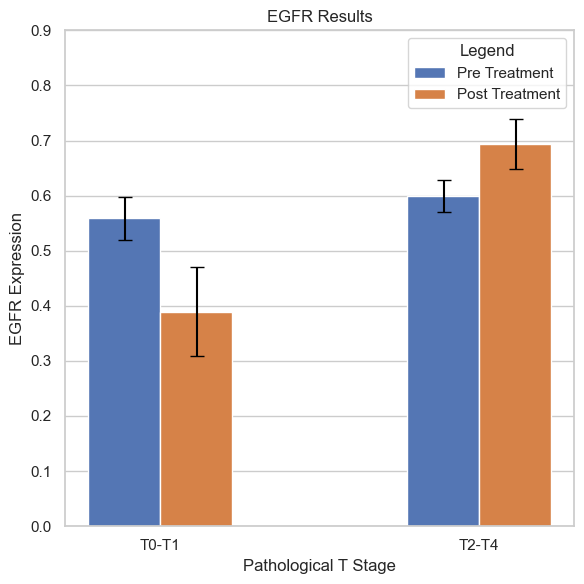

In [56]:
create_cancer_stage_plots(pre_index=-6, post_index=-1, receptor="EGFR", set_y_ticks=True)